# Topic Modeling

El objetivo de este modelo es descubrir temas latentes en textos. Se le entrega un conjunto de documentos y el modelo entrega una distribucion de temas por documento.

# Latent Dirichlet Allocation (LDA)

Como funciona:

Modelo generativo probabilistico (primera aproximacion a los LLM). Parte con los supuestos de que cada documneto es una mezcla de temas y cada tema es una distribución sobre palabras.

Tiene los siguientes parametros:

- alpha: Distribucion de temas por documento
- beta: Distribucion de palabras por tema
- k: Numero de temas (hiperparametro)

Proceso generativo de LDA:

Primero escoge una distribucion de temas. Luego para cada palabra en el documento escoge un tema y escoge una palabra. Lo que busca es controlar la concentracion de temas por documento y definir la distribucion de palabras por tema.

Veamos LDA Topic Modeling con scikit-learn y dataset de noticias.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import numpy as np

Cargado del dataset. Le quitamos los títulos, los pié de páginas y las citas para quedarnos con el texto integro.

In [ ]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
texts = newsgroups.data[:2000] # Para eficiencia nos quedaremos con 2000 textos

Visualicemos los primeros 10 textos.

In [ ]:
texts[0:10]

["\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n",
 'My brother is in the market for a high-performance video card that supports\nVESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:\n\n  - Diamond Stealth Pro Local Bus\n\n  - Orchid Farenheit 1280\n\n  - ATI Graphics Ultra Pro\n\n  - Any other high-per

Preprocesar:

Antes de entrenar un modelo LDA, el texto debe estar limpio y en un formato estructurado. Para esto se realiza lo siguiente:

- Tokenizar: Separar el texto en unidades mas pequeñas, normalmente palabras o tambien pueden ser las raices de las palabras.
- Stopwords: Se eliminan las palabras muy comunes o que no opartan significado

Vectorizar:

Se procede a transformar el texto en numeros para que pueda ser interpretado por un modelo. Esto lo podemos hacer a través de:

- CountVectorizer: Convierte cada documento en un vector que cuenta cuantas veces aparece cada palabra (frecuencias)
- TF-IDF: Da mas peso a palabras frecuentes en un documento pero raras en el corpus.

In [ ]:
vectorizer = CountVectorizer(max_df=0.95, min_df=5, stop_words='english')
X = vectorizer.fit_transform(texts)

In [ ]:
X.shape

(2000, 4874)

Entonces son 2000 textos con 4874 tokens (palabras diferentes).

Entrenamiento:

Para el entrenamiento se utiliza inferencia inversa. Se busca estimar la proporcion de temas por documento, la distribucion de palabras por tema y la asignación de tema por palabra.

Los métodos de estimacion son Gibbs Sampling (MCMC) y Variational Bayes.

In [ ]:
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X)

LatentDirichletAllocation(random_state=42)

Procedamos a mostrar las palabras que se generaron por tema.

In [ ]:
def mostrar_top_palabras(model, feature_names, n_palabras):
    for idx, topic in enumerate(model.components_):
      print(f"Tópico {idx+1}:")
      print(" ".join([feature_names[i] for i in topic.argsort()[:-n_palabras - 1:-1]]))
      print()

In [ ]:
n_palabras = 10 # Vamos a mostrar 10 palabras por tópico
feature_names = vectorizer.get_feature_names_out()
mostrar_top_palabras(lda, feature_names, n_palabras)

Tópico 1:
think don people like just know say way does good

Tópico 2:
use jpeg file windows image thanks does card bit files

Tópico 3:
ed armenian people government israel states united jewish armenians history

Tópico 4:
god jesus people did like children fbi time bible just

Tópico 5:
edu com cs os comp os2 ca org david john

Tópico 6:
key 000 don use chip article car law just like

Tópico 7:
space power cost new data station high program low 93

Tópico 8:
10 11 17 van 12 det 15 34 24 30

Tópico 9:
00 game dos know don just year games right hit

Tópico 10:
information internet use privacy police mail address email anonymous security



Ahora, vamos a graficar la distribución de estos topicos en un documento.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

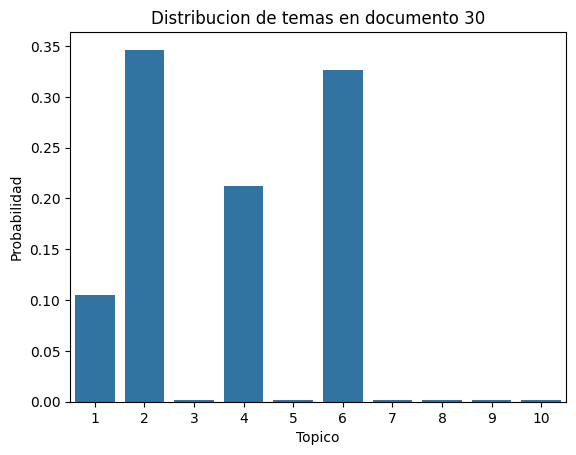

In [ ]:
sample_doc = X[30]
topic_dist = lda.transform(sample_doc)

sns.barplot(x=np.arange(1,11), y=topic_dist[0])
plt.title("Distribucion de temas en documento 30")
plt.xlabel("Topico")
plt.ylabel("Probabilidad")
plt.show()